<a href="https://colab.research.google.com/github/Fredrick-Sam-Nilesh/datascience/blob/main/CAR_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [81]:
df=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/car_price_prediction.csv')

In [82]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [83]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [84]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19232    False
19233    False
19234    False
19235    False
19236    False
Length: 19237, dtype: bool

In [85]:
df=df.drop_duplicates()

In [86]:
df.describe

<bound method NDFrame.describe of              ID  Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      45654403  13328  1399          LEXUS   RX 450        2010       Jeep   
1      44731507  16621  1018      CHEVROLET  Equinox        2011       Jeep   
2      45774419   8467     -          HONDA      FIT        2006  Hatchback   
3      45769185   3607   862           FORD   Escape        2011       Jeep   
4      45809263  11726   446          HONDA      FIT        2014  Hatchback   
...         ...    ...   ...            ...      ...         ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236  45813273    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather int

In [87]:
df.shape

(18924, 18)

In [88]:
df=df.drop(columns=['ID'])

In [89]:
df.head(1)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [90]:
df['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  object 
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64 

<Axes: xlabel='Levy', ylabel='Price'>

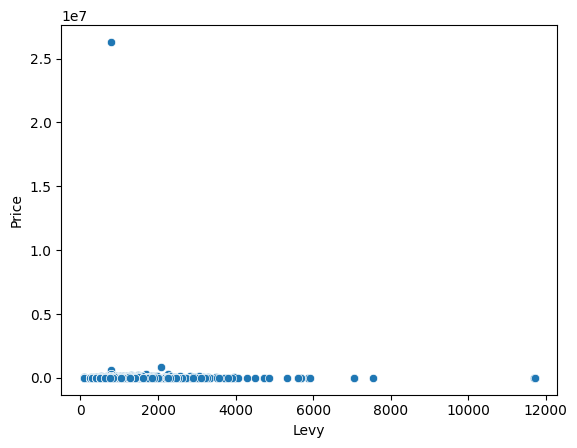

In [92]:
df['Levy'].replace({'-':0}, inplace = True)
df['Levy'] = df['Levy'].astype('int64')
df['Levy'].replace({0:df['Levy'][df['Levy'] != 0].median()}, inplace = True)

sns.scatterplot(data = df, x='Levy',y='Price')

In [93]:
df[df['Price']==df['Price'].max()]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
16983,26307500,781,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999 km,4.0,Manual,Front,02-Mar,Left wheel,Blue,0


In [94]:
df['Price'].nlargest(5)

16983    26307500
8541       872946
1225       627220
5008       308906
9367       297930
Name: Price, dtype: int64

In [95]:
#remove price that stang
df=df.drop(df[df['Price']==df['Price'].max()].index)

In [96]:
df.groupby('Prod. year').agg({'Price':['mean','max','min']})

Price                
                     mean     max     min
Prod. year                               
1939           171.333333     200     157
1943        119172.000000  119172  119172
1947           150.000000     150     150
1953         17735.250000   51746     314
1957          7527.000000    7527    7527
1964          6585.500000    7840    5331
1965         65074.000000   65858   64290
1968          2200.000000    2200    2200
1973         15681.000000   15681   15681
1974          2437.000000    2437    2437
1976           400.000000     400     400
1977         10340.500000   15681    5000
1978          1400.000000    1500    1300
1980          1925.000000    2700    1150
1981          2800.000000    2800    2800
1982         31361.000000   31361   31361
1983          1300.000000    1700    1000
1984          4046.000000   10976     750
1985          2995.000000    4300     941
1986          4906.833333   10976    2000
1987          8828.400000   20385    2822
1988          4849.250000   15681     600
1989          3546.333333    5331    2000
1990          5215.500000   19757     800
1991          4746.800000    9408    2352
1992          5677.066667   17249     700
1993          6407.956522   20385      40
1994          5980.609756   43905    1300
1995          6360.921569   54882       3
1996          6454.385321   40769     200
1997          6313.139073   18817       6
1998          7369.692683   37354       3
1999          7643.504902   28222       1
2000          8095.519856   28225      65
2001          8526.952569   46414       6
2002          9243.901754   70562      25
2003          9773.946927   87811      20
2004         11249.971751   62722       3
2005         10904.174242   94083       9
2006         12926.117460   51746       1
2007         13058.215217   54882      25
2008         11472.160055  117604      20
2009         13627.605042   84675      30
2010         14289.215995   86243      25
2011         14039.120101  109764       3
2012         15352.572970  219527       3
2013         16714.076320  216391      25
2014         17914.195694  163077       3
2015         20918.979699  297930       3
2016         28336.581781  308906       3
2017         26999.066950  250574      47
2018         35386.830957  288521       3
2019         30746.187500  872946     110
2020         63006.106383  627220       3

(array([1930., 1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010.,
        2020., 2030.]),
 [Text(1930.0, 0, '1930'),
  Text(1940.0, 0, '1940'),
  Text(1950.0, 0, '1950'),
  Text(1960.0, 0, '1960'),
  Text(1970.0, 0, '1970'),
  Text(1980.0, 0, '1980'),
  Text(1990.0, 0, '1990'),
  Text(2000.0, 0, '2000'),
  Text(2010.0, 0, '2010'),
  Text(2020.0, 0, '2020'),
  Text(2030.0, 0, '2030')])

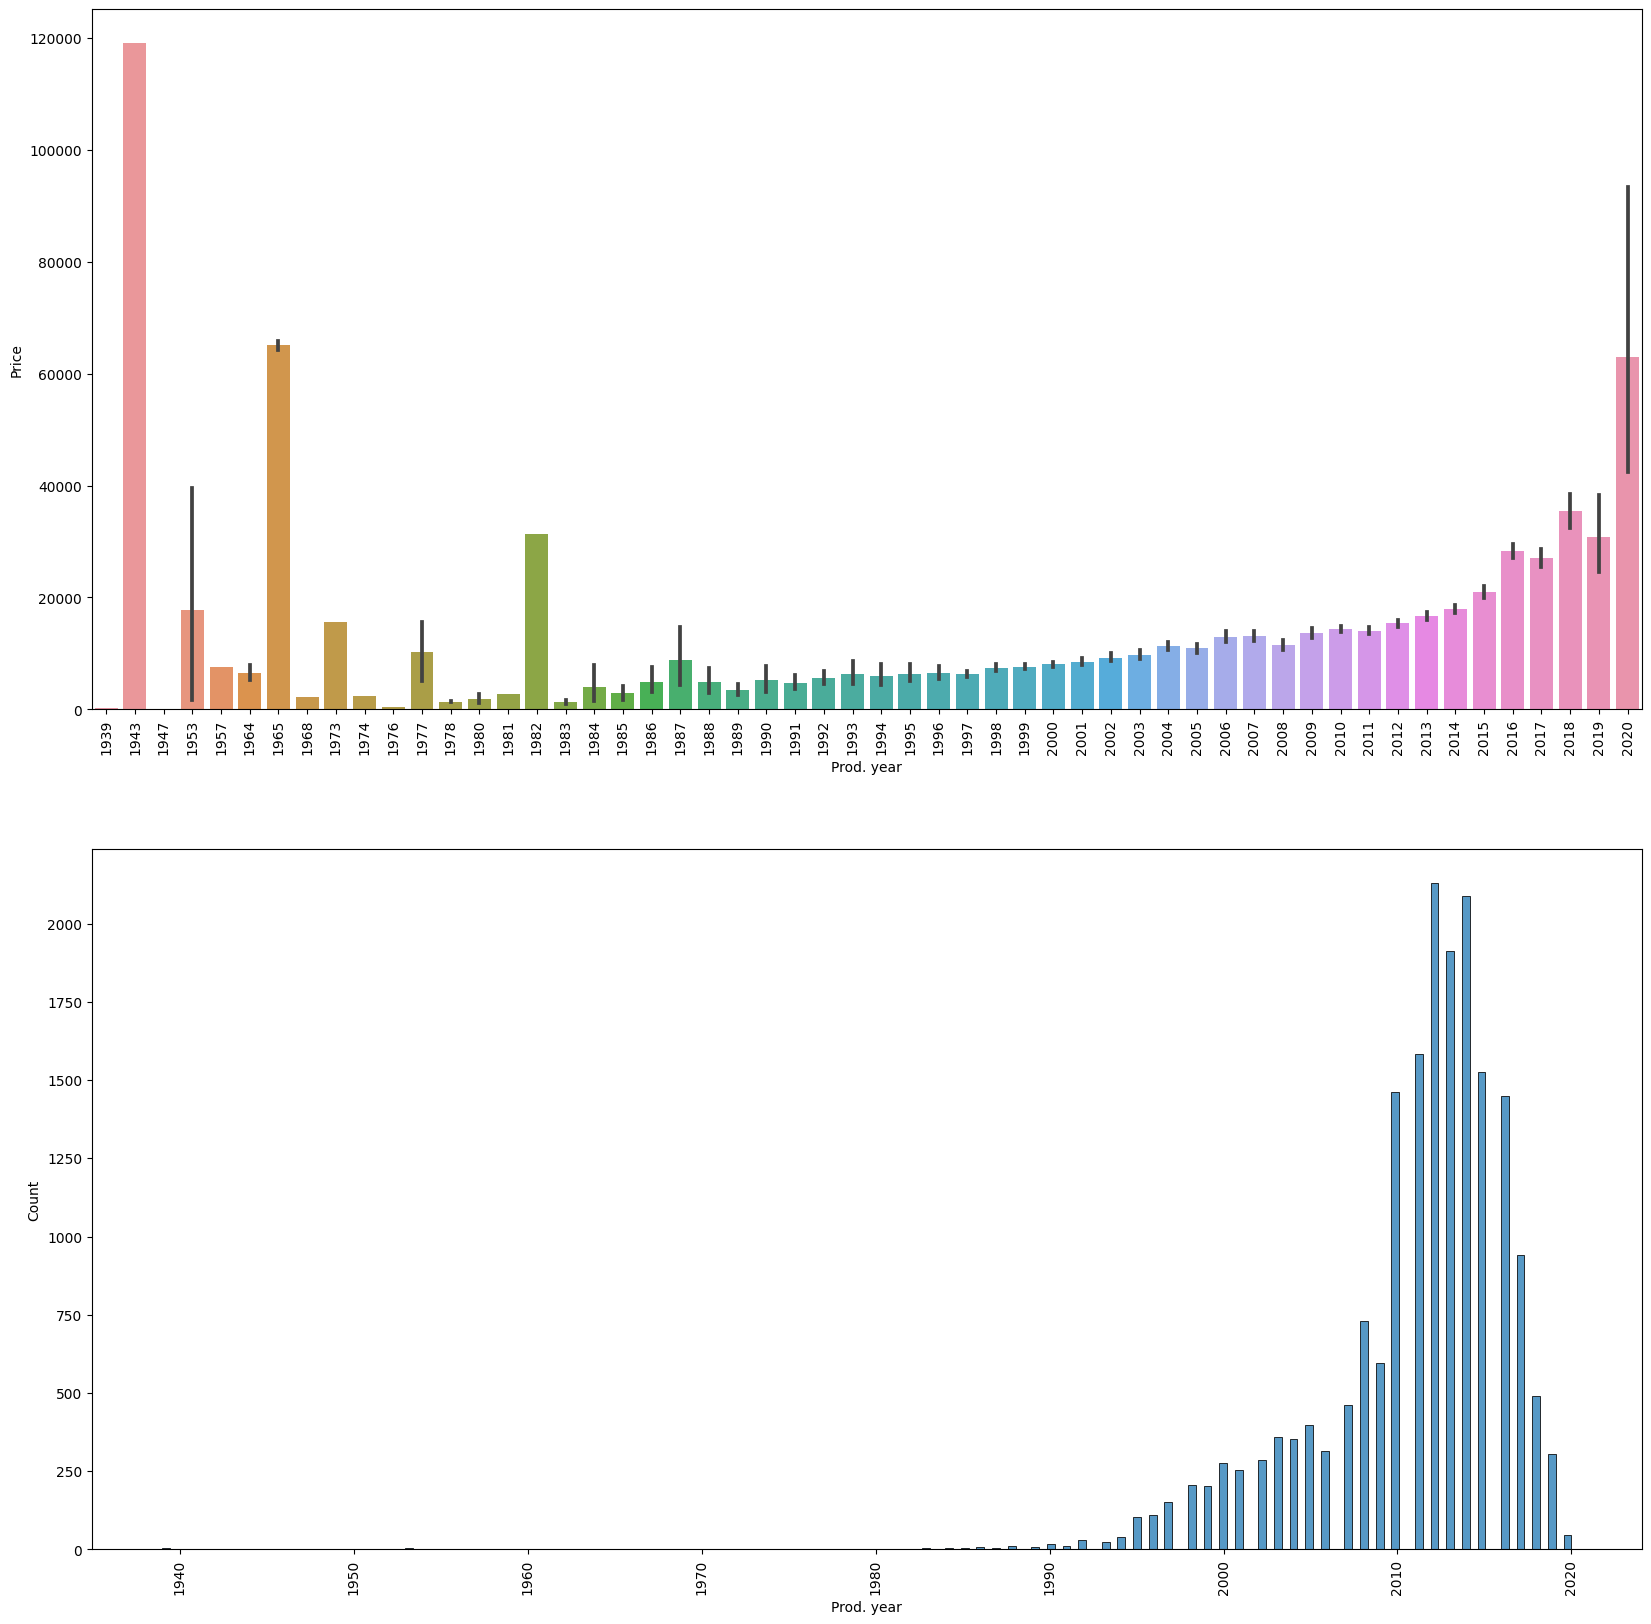

In [97]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.barplot(data=df,x='Prod. year',y='Price',estimator='mean')
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.histplot(data=df['Prod. year'])
plt.xticks(rotation=90)

In [98]:
df['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

In [99]:
df.groupby('Category').agg({'Price':['count','min','max','mean']})

Price                            
            count   min     max          mean
Category                                     
Cabriolet      35   100   86142  24407.971429
Coupe         528     3  308906  21282.356061
Goods wagon   228    50  103491  10003.877193
Hatchback    2799     1   78829  11354.611647
Jeep         5378     3  627220  23760.507252
Limousine      11   150   30420  11534.454545
Microbus      299   100   95000  18538.933110
Minivan       633    50  106668  20601.456556
Pickup         51   314  116036  29362.392157
Sedan        8600     1  288521  14202.733837
Universal     361  1490  872946  25350.628809

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Jeep'),
  Text(1, 0, 'Hatchback'),
  Text(2, 0, 'Sedan'),
  Text(3, 0, 'Microbus'),
  Text(4, 0, 'Goods wagon'),
  Text(5, 0, 'Universal'),
  Text(6, 0, 'Coupe'),
  Text(7, 0, 'Minivan'),
  Text(8, 0, 'Cabriolet'),
  Text(9, 0, 'Limousine'),
  Text(10, 0, 'Pickup')])

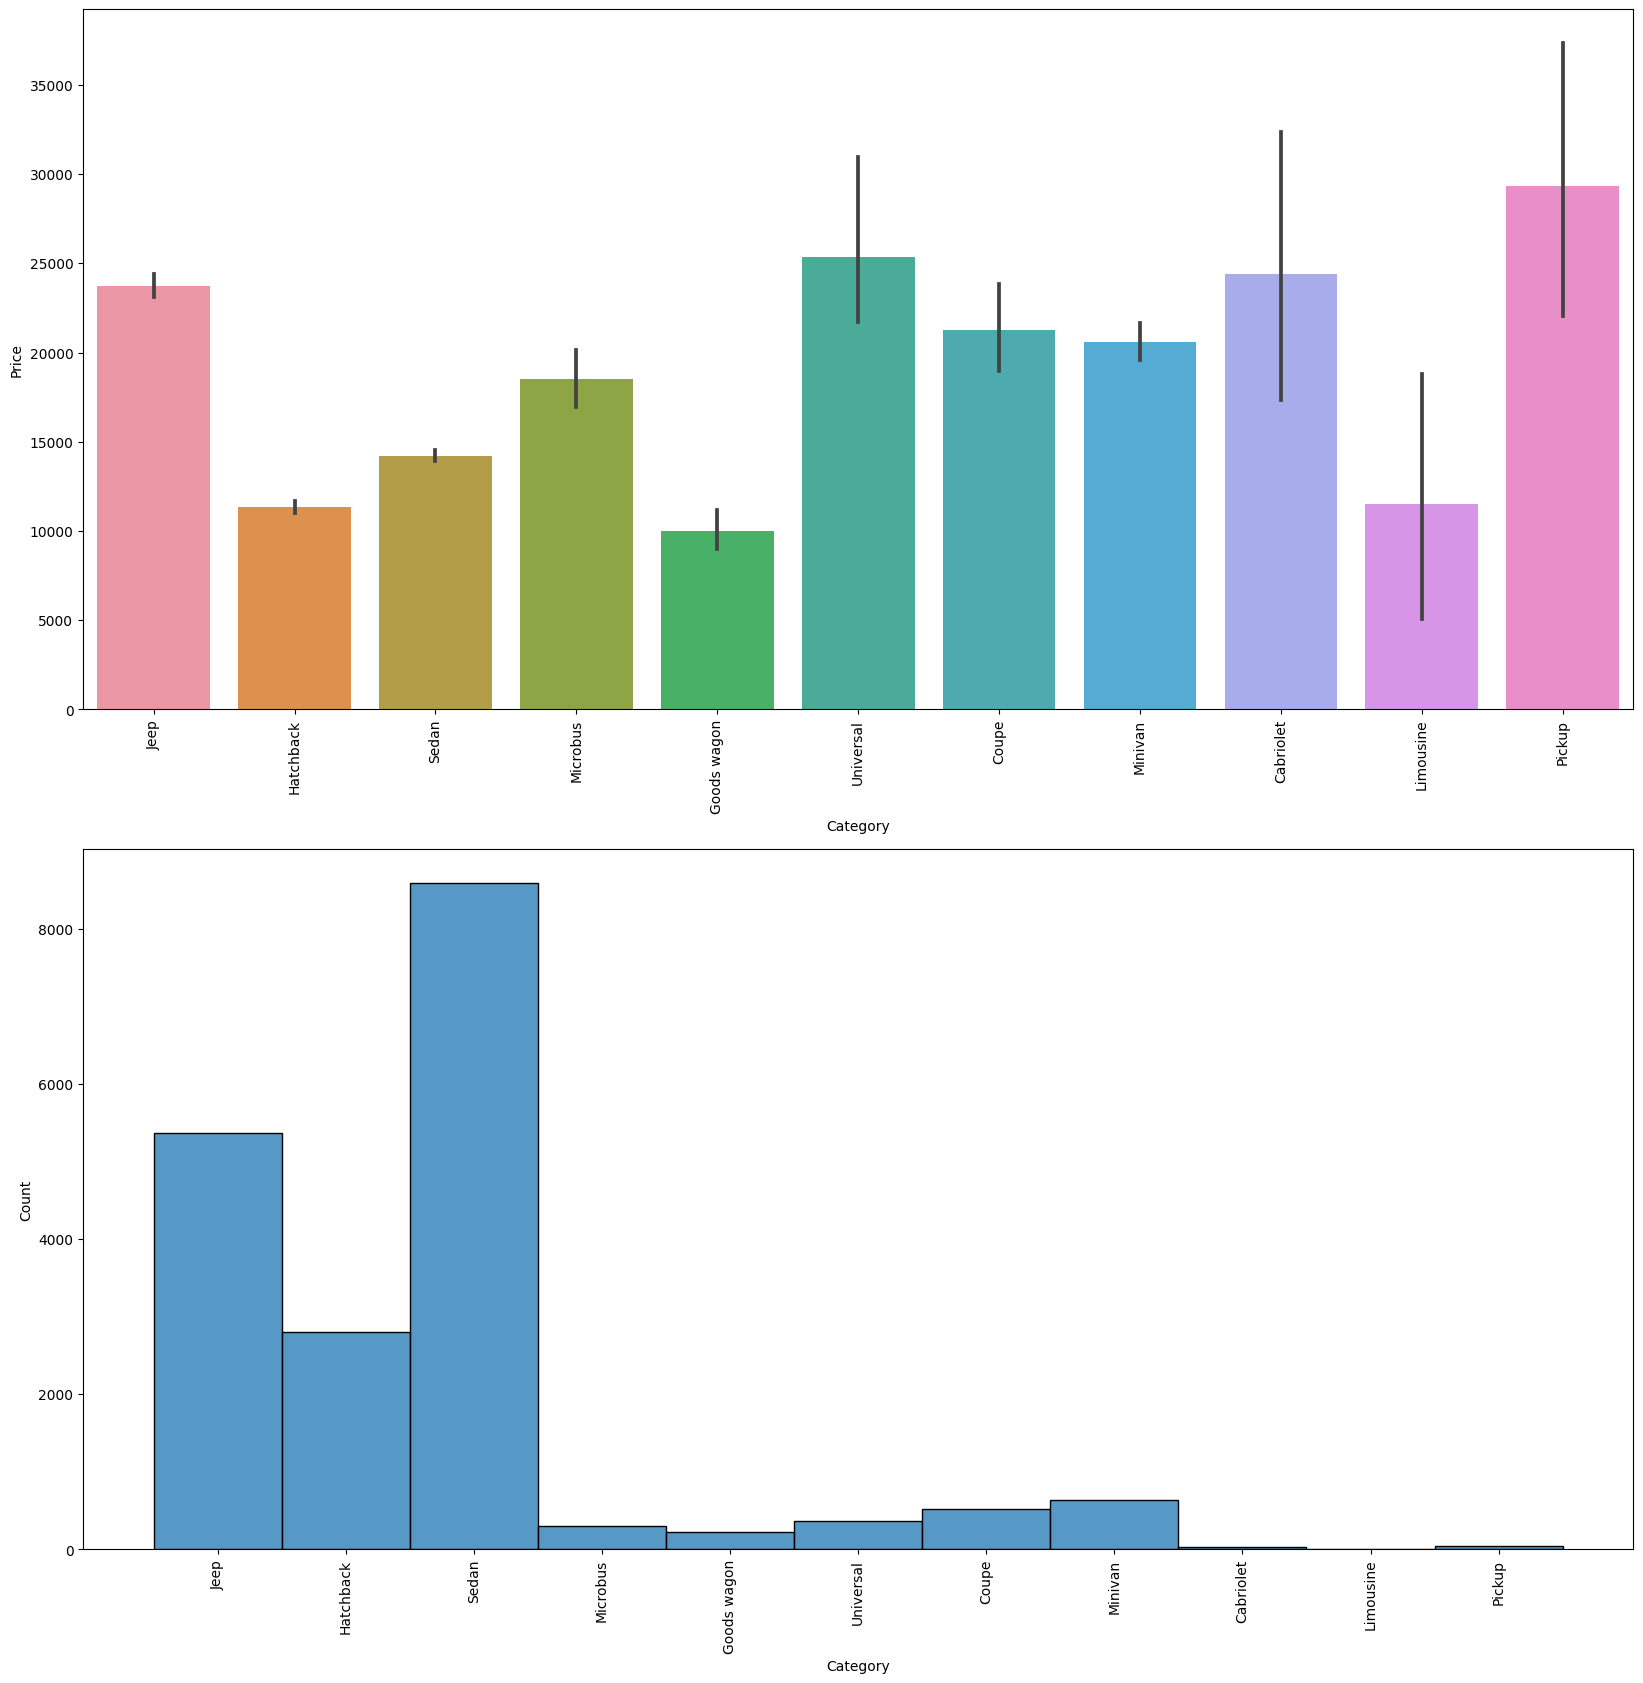

In [100]:
plt.figure(figsize=( 20,20))
plt.subplot(2,1,1)
sns.barplot(data=df,x='Category',y='Price',estimator='mean')
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.histplot(data=df['Category'])
plt.xticks(rotation=90)


In [101]:
df.groupby('Leather interior').agg({'Price':['count', 'mean', 'max', 'min']})

Price                          
                  count          mean     max min
Leather interior                                 
No                 5192  13351.925847  147397   1
Yes               13731  18652.532663  872946   1

<Axes: xlabel='Leather interior', ylabel='Price'>

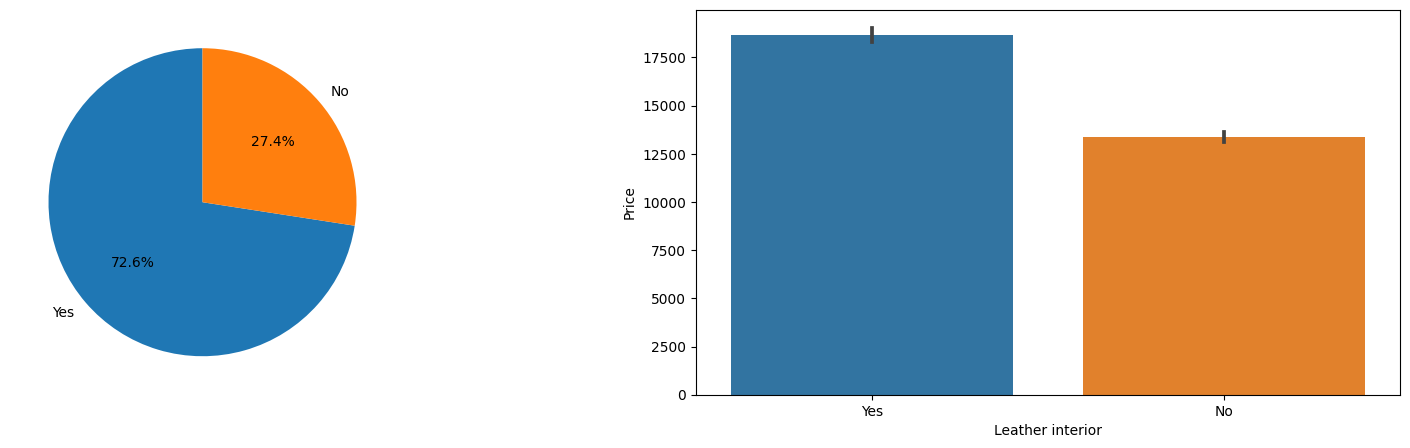

In [102]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.pie(df['Leather interior'].value_counts(), labels=df['Leather interior'].unique(), autopct='%1.1f%%', startangle=90)

plt.subplot(1,2,2)
sns.barplot(data=df, x='Leather interior', y='Price', estimator='mean')

In [103]:
df['Fuel type'].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

In [104]:
df.groupby('Fuel type').agg({'Price':['count', 'mean', 'max', 'min']})

Price                             
               count          mean     max    min
Fuel type                                        
CNG              469   8186.859275   42337      6
Diesel          4000  24115.589000  297930      3
Hybrid          3539  10845.476688  133284      9
Hydrogen           1  20385.000000   20385  20385
LPG              885  13320.505085   68681      3
Petrol          9944  17391.153459  872946      1
Plug-in Hybrid    85  23650.917647   94083   1019

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Hybrid'),
  Text(1, 0, 'Petrol'),
  Text(2, 0, 'Diesel'),
  Text(3, 0, 'CNG'),
  Text(4, 0, 'Plug-in Hybrid'),
  Text(5, 0, 'LPG'),
  Text(6, 0, 'Hydrogen')])

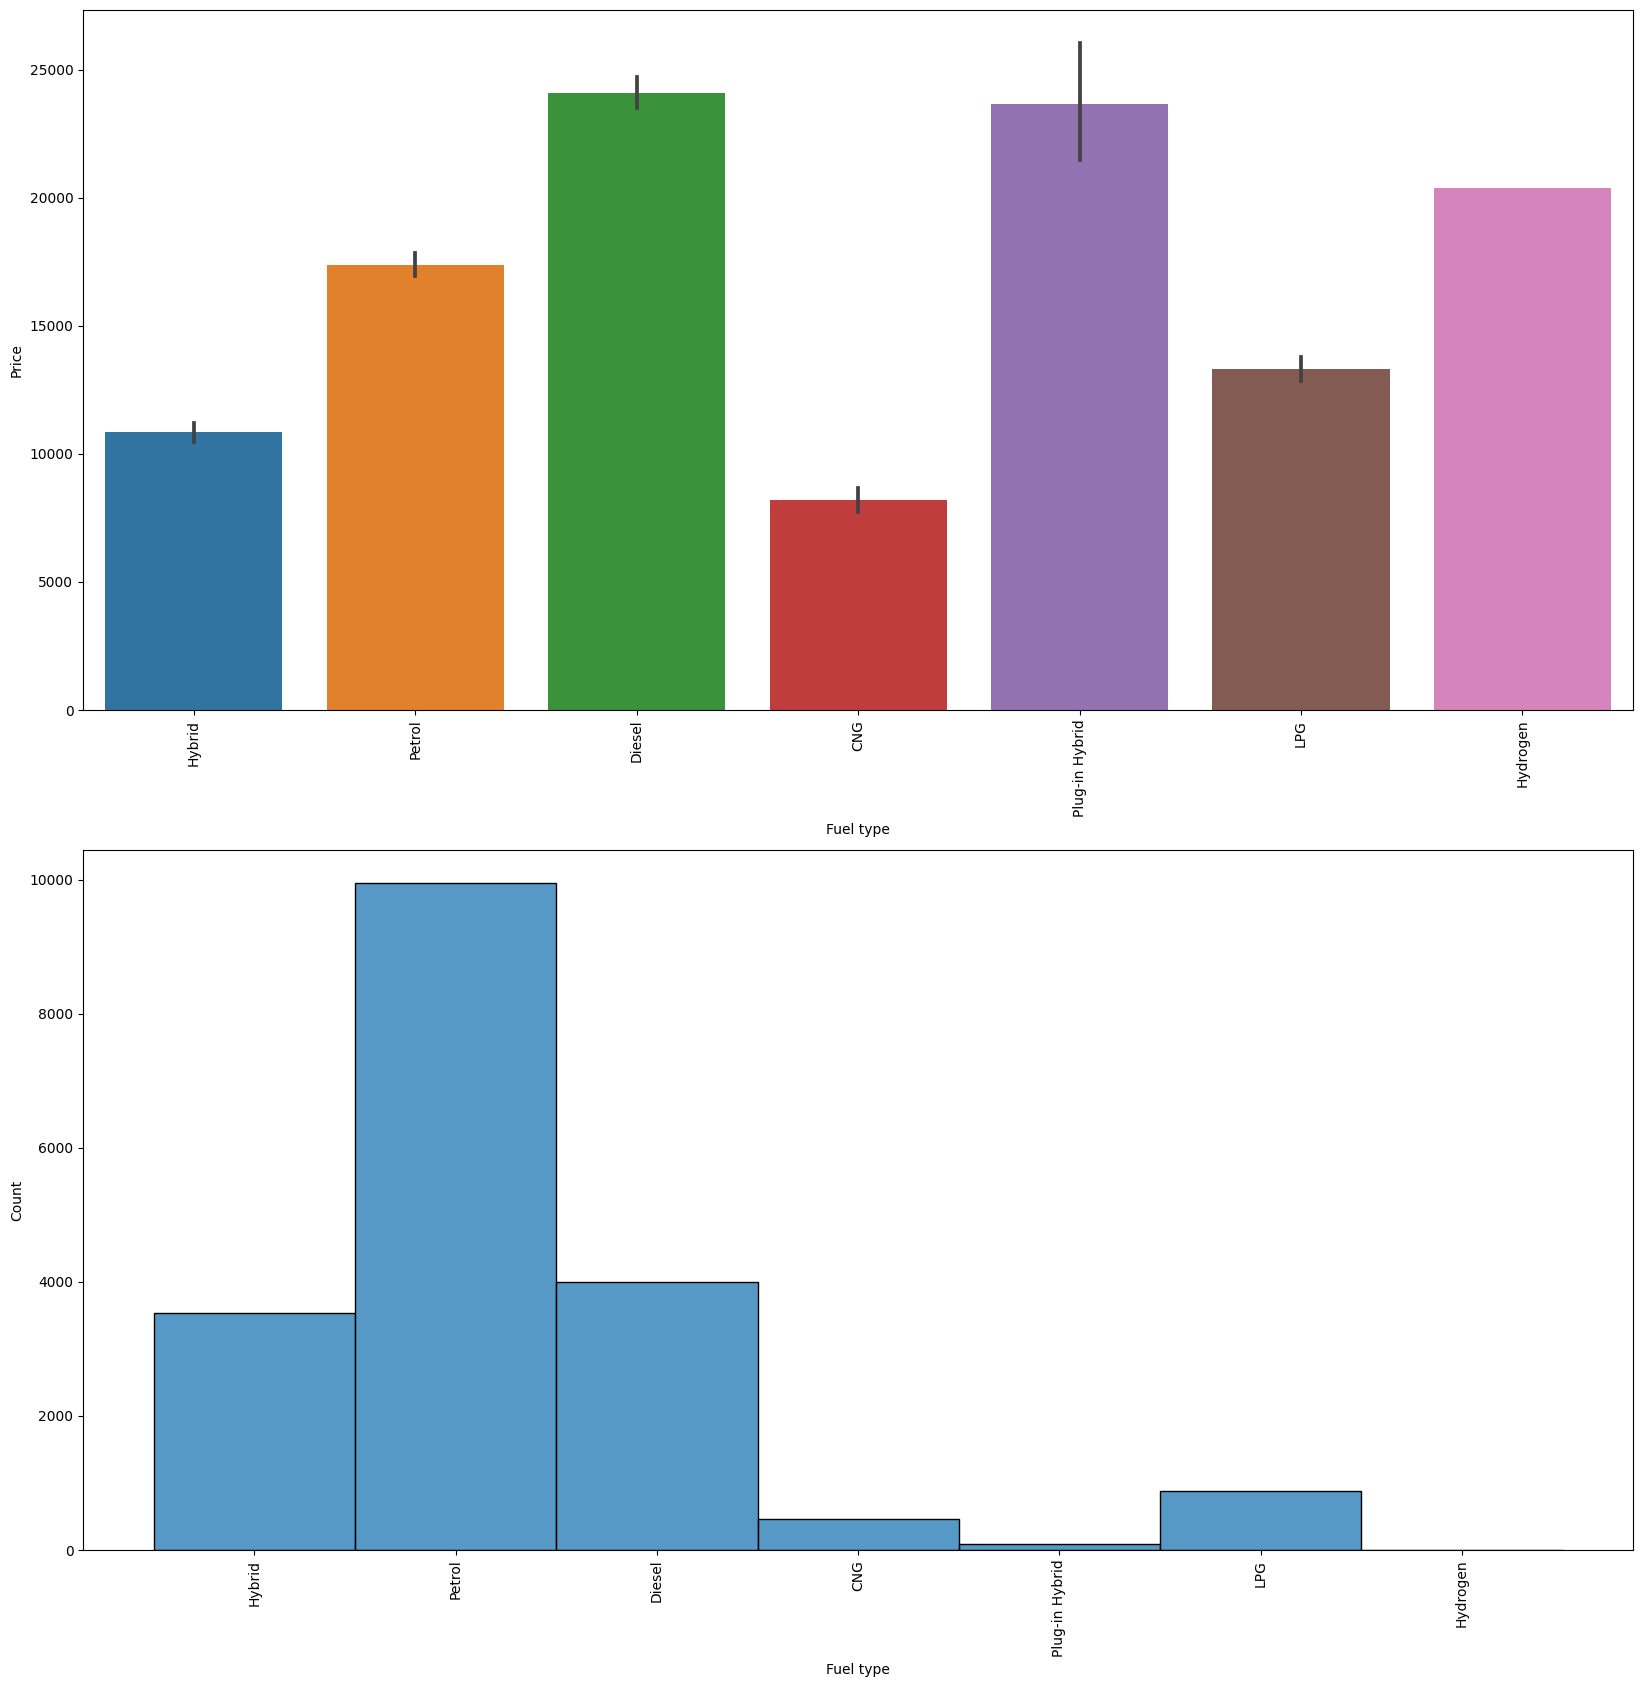

In [105]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.barplot(data=df, x='Fuel type', y='Price', estimator='mean')
plt.xticks(rotation = 90)

plt.subplot(2,1,2)
sns.histplot(data=df['Fuel type'])
plt.xticks(rotation = 90)

In [106]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [107]:
# Delete Turdo in Engine volume and Create Turbo column
df['Turbo'] = df['Engine volume'].str.contains('Turbo')
df['Engine volume'] = df['Engine volume'].str.strip(' Turbo')
df['Engine volume'] = df['Engine volume'].astype('float64')

In [108]:
print(df.groupby('Engine volume').agg({'Price':['count', 'mean', 'max', 'min']}).to_string())

              Price                               
              count           mean     max     min
Engine volume                                     
0.0              10   17844.700000   53941       3
0.1               4    3147.500000    8624     300
0.2              10    2916.700000    8154     314
0.3               3    3924.000000    6272    2500
0.4              23    7583.130435  163077     188
0.5               1    1300.000000    1300    1300
0.6               7    4850.714286    8781     314
0.7              25    6662.360000   14000     600
0.8               9    7504.888889   31361    2000
0.9               2    5096.000000    5645    4547
1.0             123    9862.520325   46414    1000
1.1               9    4972.555556   10976     700
1.2             105    8432.600000   57391     314
1.3             534    8144.376404  103491      20
1.4             517   11738.470019   61951       3
1.5            1354   14009.296898   78829       3
1.6            1562   16837.359

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(-2.5, 0, '−2.5'),
  Text(0.0, 0, '0.0'),
  Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0'),
  Text(12.5, 0, '12.5'),
  Text(15.0, 0, '15.0'),
  Text(17.5, 0, '17.5'),
  Text(20.0, 0, '20.0'),
  Text(22.5, 0, '22.5')])

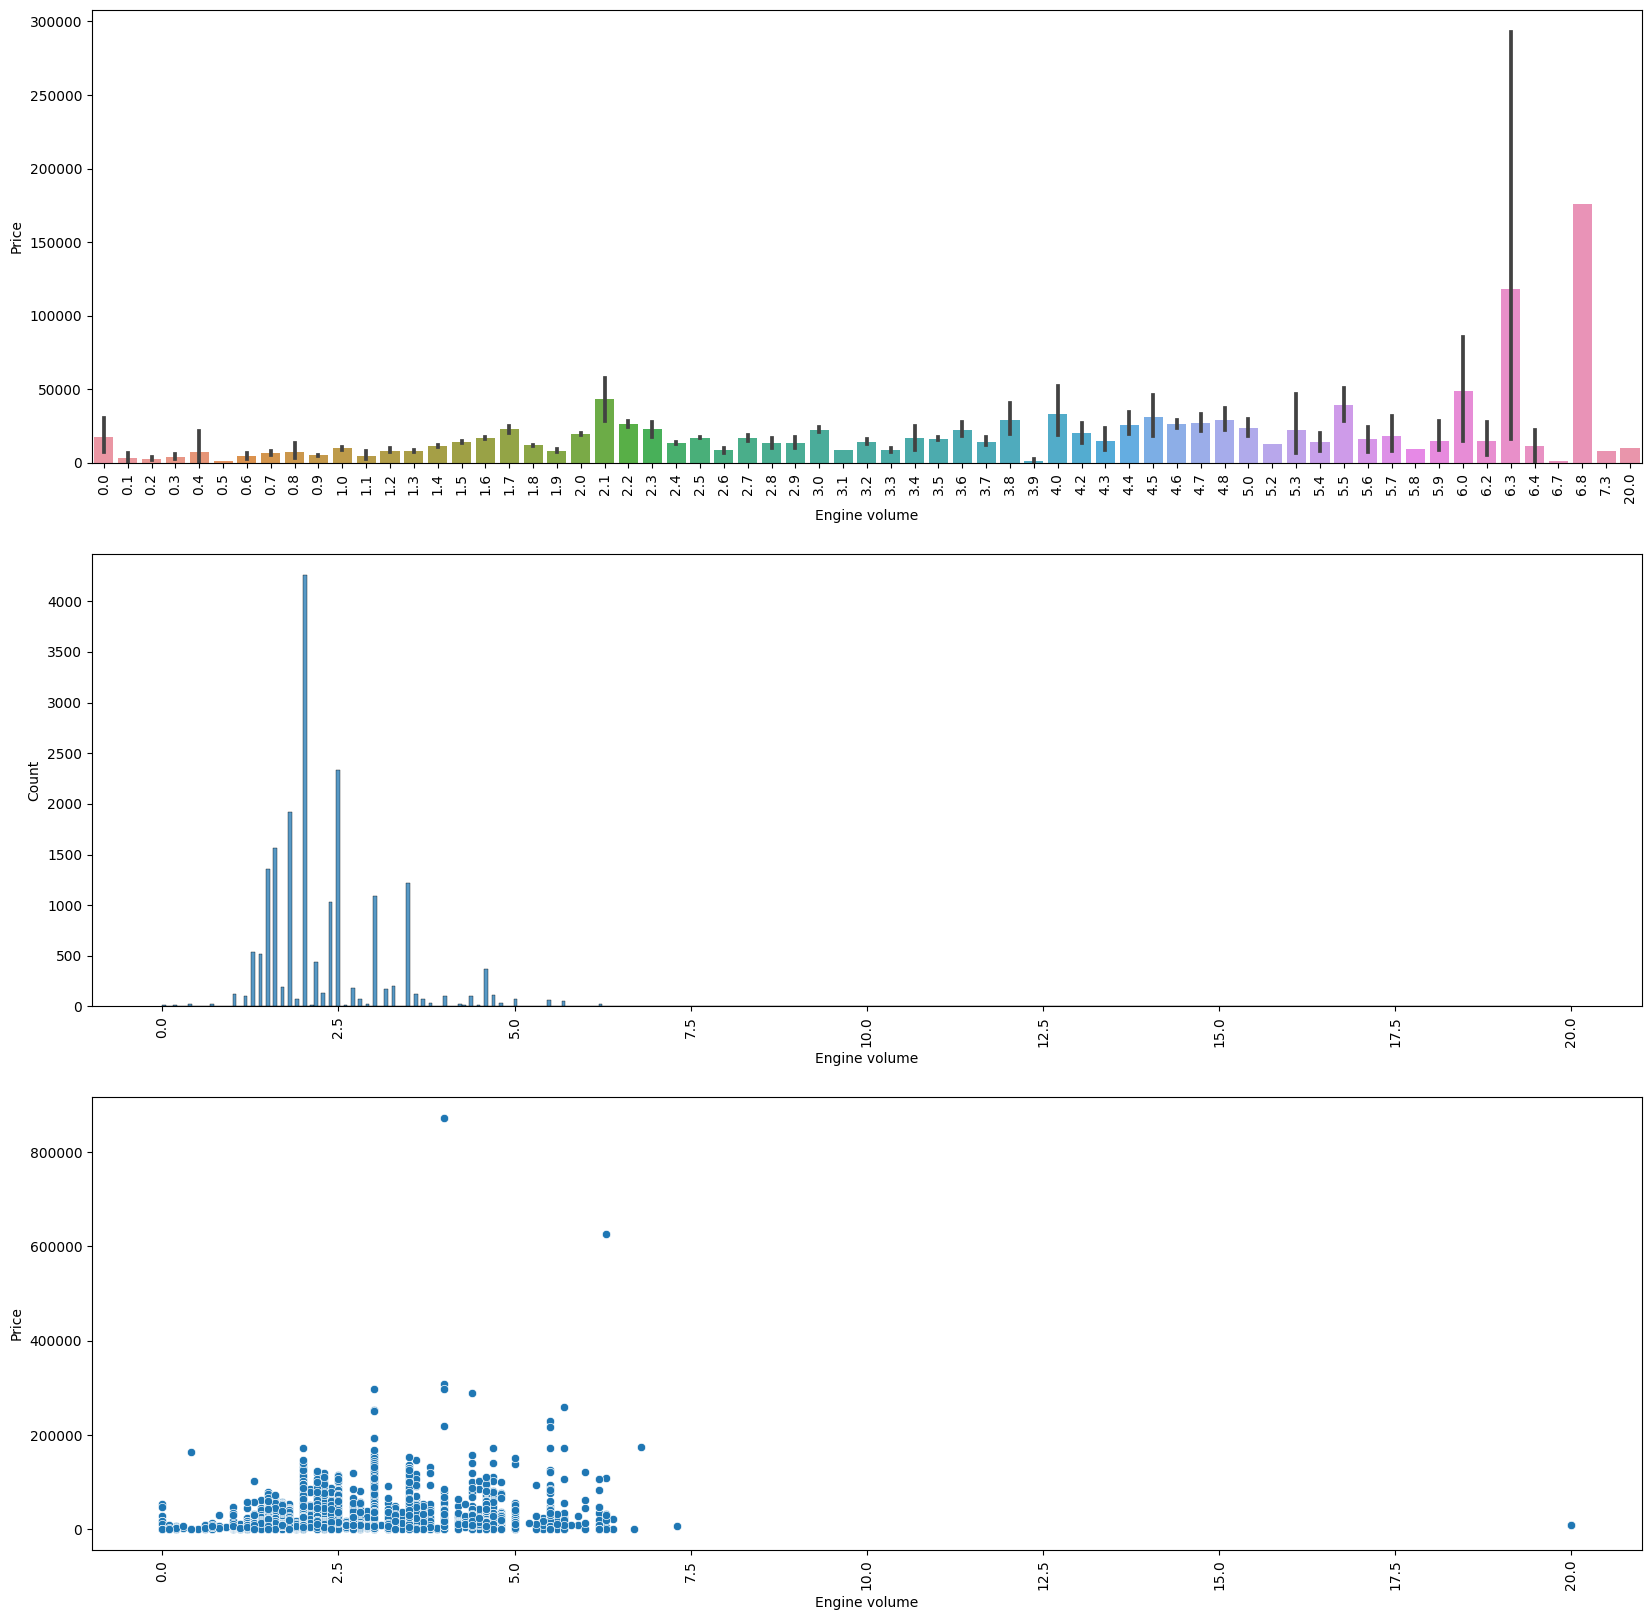

In [109]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.barplot(data=df, x='Engine volume', y='Price', estimator='mean')
plt.xticks(rotation = 90)

plt.subplot(3,1,2)
sns.histplot(data=df['Engine volume'])
plt.xticks(rotation = 90)

plt.subplot(3,1,3)
sns.scatterplot(data=df, x='Engine volume', y='Price')
plt.xticks(rotation = 90)

In [110]:
df.groupby('Turbo').agg({'Price':['count', 'mean', 'max', 'min']})

Price                          
       count          mean     max min
Turbo                                 
False  17031  15956.916212  872946   1
True    1892  28371.503700  627220   3

<Axes: xlabel='Turbo', ylabel='Price'>

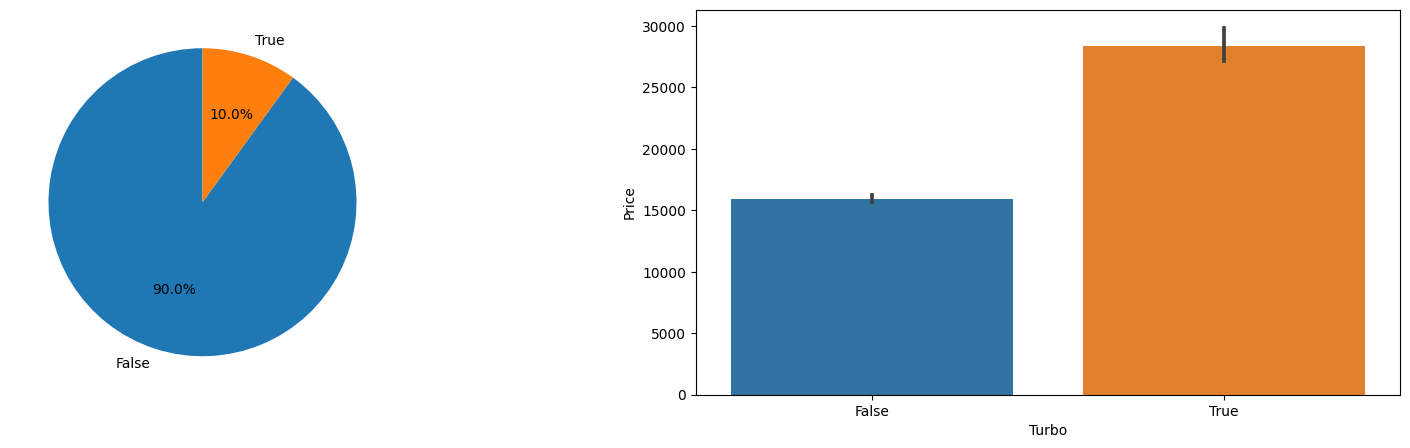

In [111]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.pie(df['Turbo'].value_counts(), labels=df['Turbo'].unique(), autopct='%1.1f%%', startangle=90)

plt.subplot(1,2,2)
sns.barplot(data=df, x='Turbo', y='Price', estimator='mean')

In [112]:
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [113]:
# remove km in Mileage columns
df['Mileage'] = df['Mileage'].str.strip(' km')
df['Mileage'] = df['Mileage'].astype('int64')

<Axes: xlabel='Mileage', ylabel='Price'>

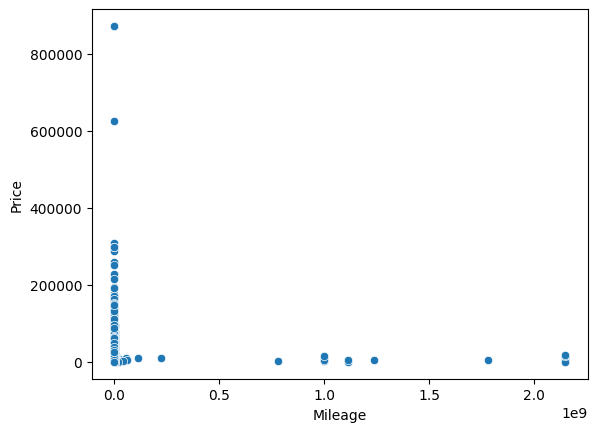

In [114]:
sns.scatterplot(data=df, x='Mileage', y='Price')

In [115]:
df['Cylinders'].unique()

array([ 6.,  4.,  8.,  1., 12.,  3.,  2., 16.,  5.,  7.,  9., 10., 14.])

In [116]:
df.groupby('Cylinders').agg({'Price':['count', 'mean', 'max', 'min']})

Price                             
           count          mean     max    min
Cylinders                                    
1.0           37  16751.810811  147397      9
2.0           42  10358.404762   30577     35
3.0          107   9879.093458   46414    314
4.0        14158  16605.604323  137885      1
5.0          169  14640.213018   90947     20
6.0         3373  16711.476134  308906      3
7.0            4   6446.500000   18503     30
8.0          976  28037.463115  872946     40
9.0            1   2800.000000    2800   2800
10.0          12  31486.666667   50178    100
12.0          38  39757.131579  172486      3
14.0           1  15681.000000   15681  15681
16.0           5  17519.800000   39829   7000

<Axes: xlabel='Cylinders', ylabel='Count'>

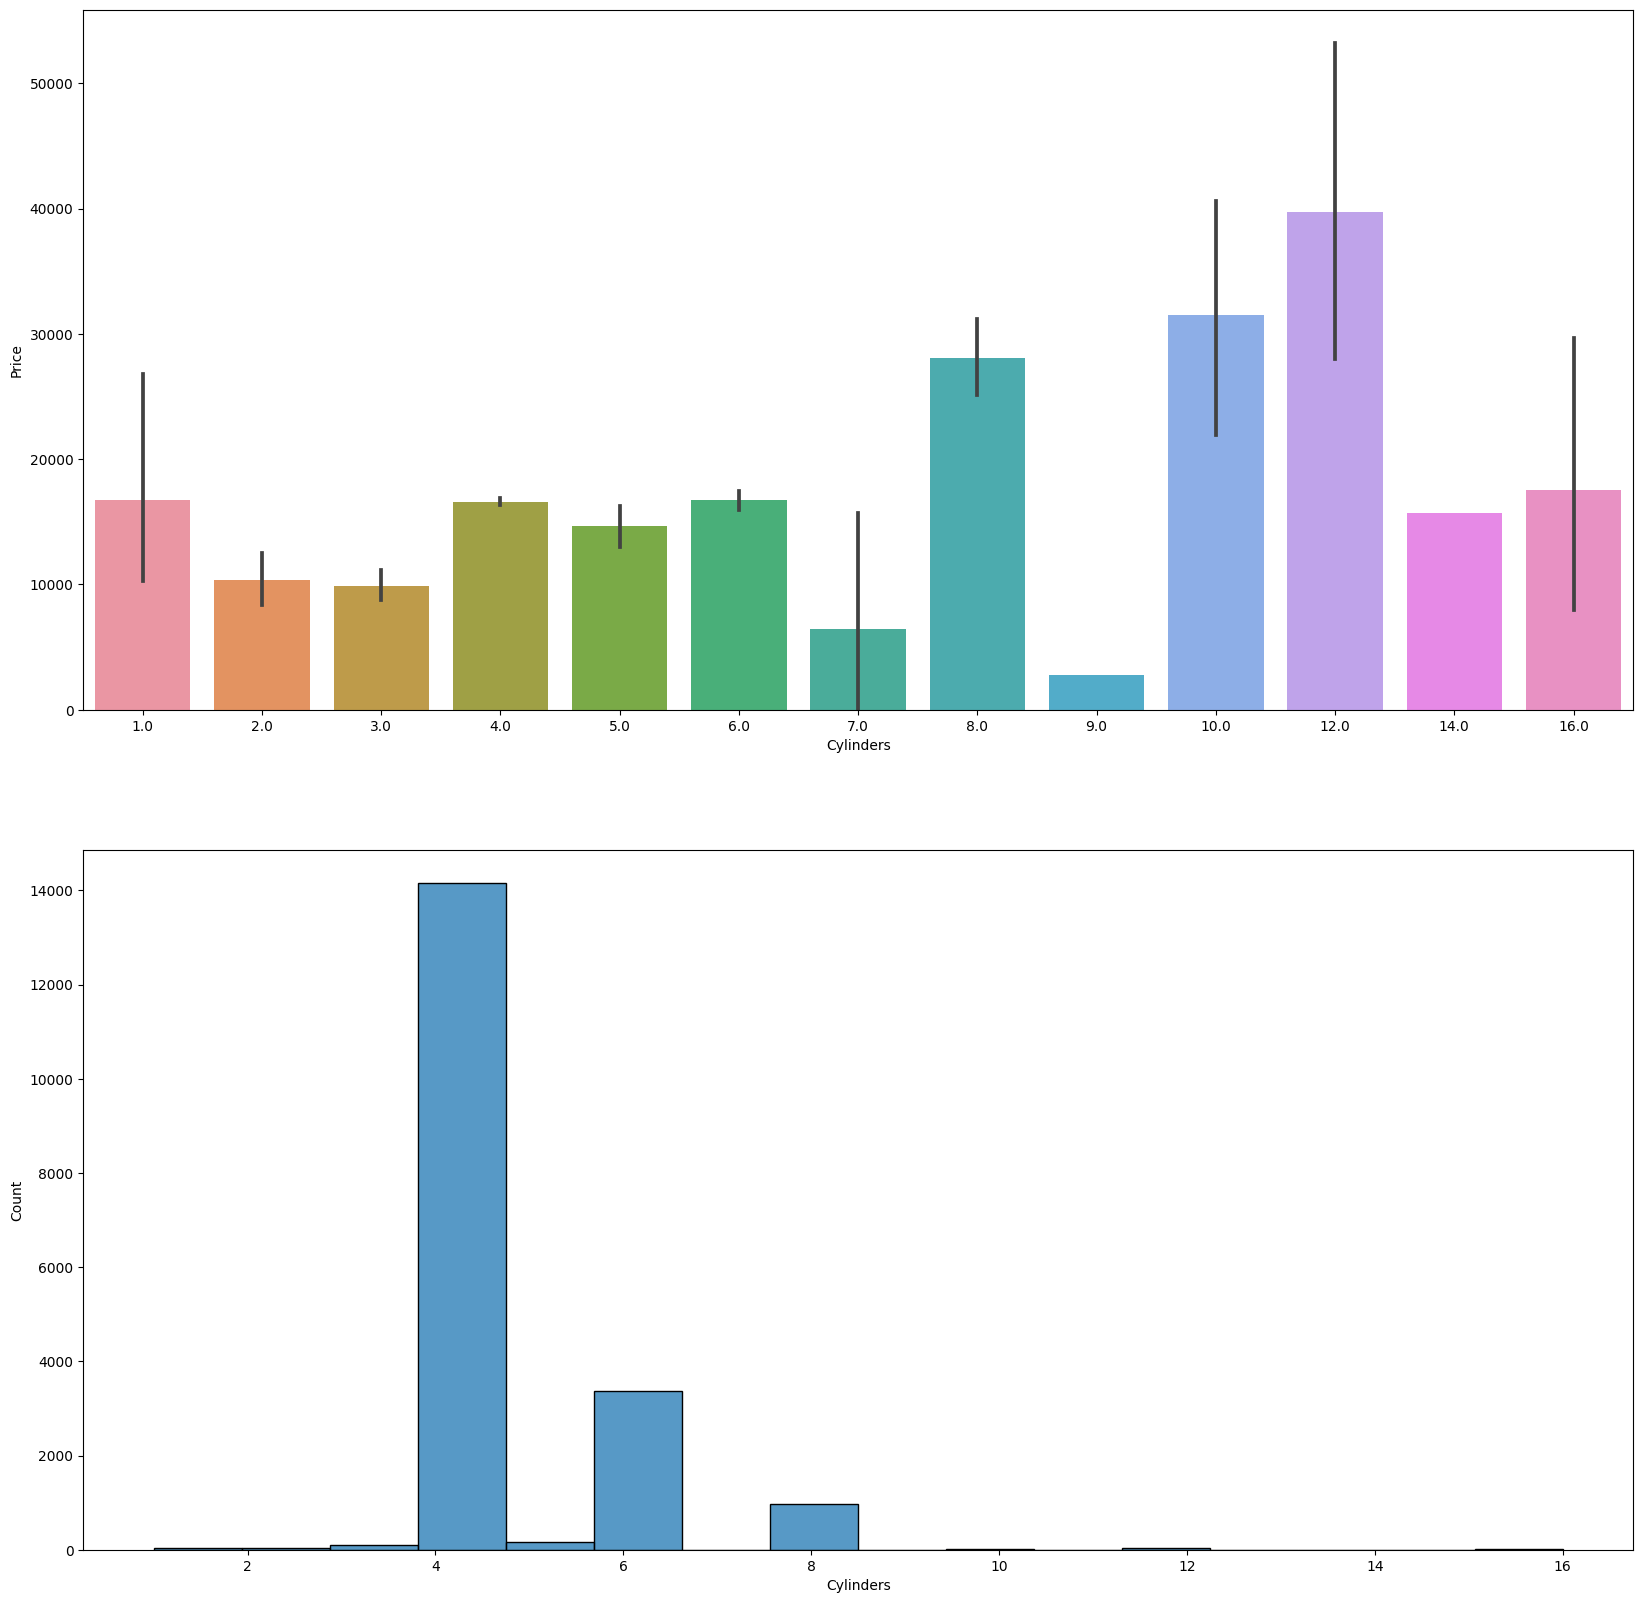

In [117]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.barplot(data=df, x='Cylinders', y='Price', estimator='mean')

plt.subplot(2,1,2)
sns.histplot(data=df['Cylinders'])

In [118]:
df['Gear box type'].unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

In [119]:
df.groupby('Gear box type').agg({'Price':['count', 'mean', 'max', 'min']})

Price                          
               count          mean     max min
Gear box type                                 
Automatic      13282  16004.732495  308906   3
Manual          1843  11605.188280  153669   1
Tiptronic       3065  26313.582708  872946   3
Variator         733  14770.497954   87497  20

<Axes: xlabel='Gear box type', ylabel='Count'>

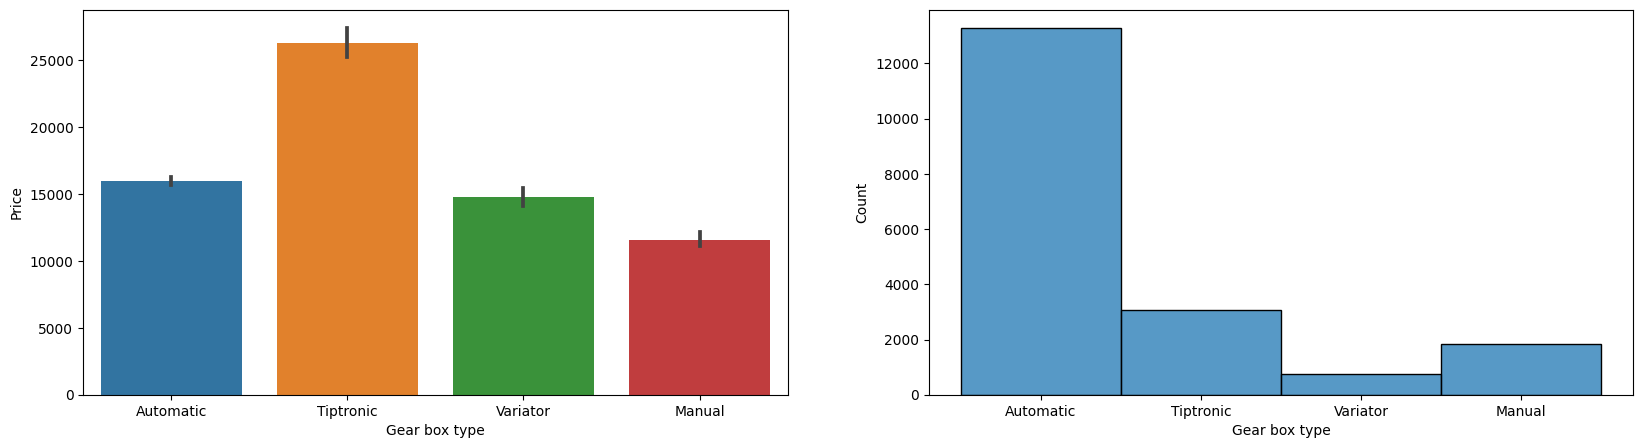

In [120]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(data=df, x='Gear box type', y='Price', estimator='mean')

plt.subplot(1,2,2)
sns.histplot(data=df['Gear box type'])

In [121]:
df['Drive wheels'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

In [122]:
df.groupby('Drive wheels').agg({'Price':['count', 'mean', 'max', 'min']})

Price                          
              count          mean     max min
Drive wheels                                 
4x4            3969  19580.303351  872946   3
Front         12694  16432.047266  137885   1
Rear           2260  17317.917257  308906   3

<Axes: xlabel='Drive wheels', ylabel='Count'>

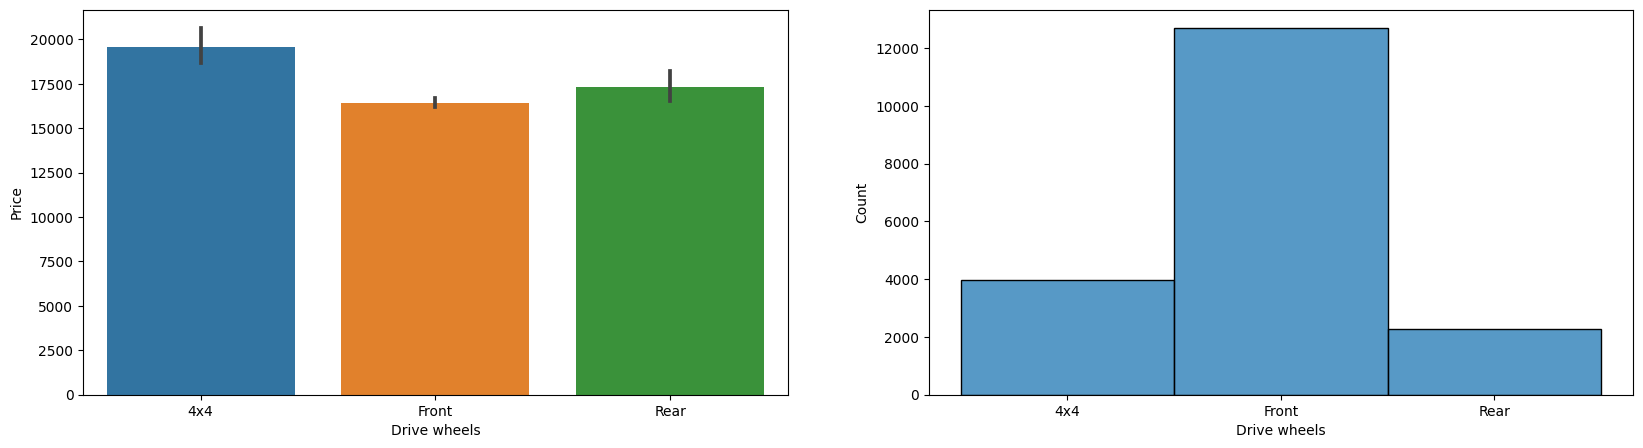

In [123]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(data=df, x='Drive wheels', y='Price', estimator='mean')

plt.subplot(1,2,2)
sns.histplot(data=df['Drive wheels'])

In [124]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [125]:
# replace data in Doors columns for understandable
df['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5}, inplace = True)

In [126]:
df.groupby('Doors').agg({'Price':['count', 'mean', 'max', 'min']})

Price                          
       count          mean     max min
Doors                                 
2        767  16560.741851  308906   3
4      18032  17192.917924  872946   1
5        124  21905.967742  106627   3

<Axes: xlabel='Doors', ylabel='Count'>

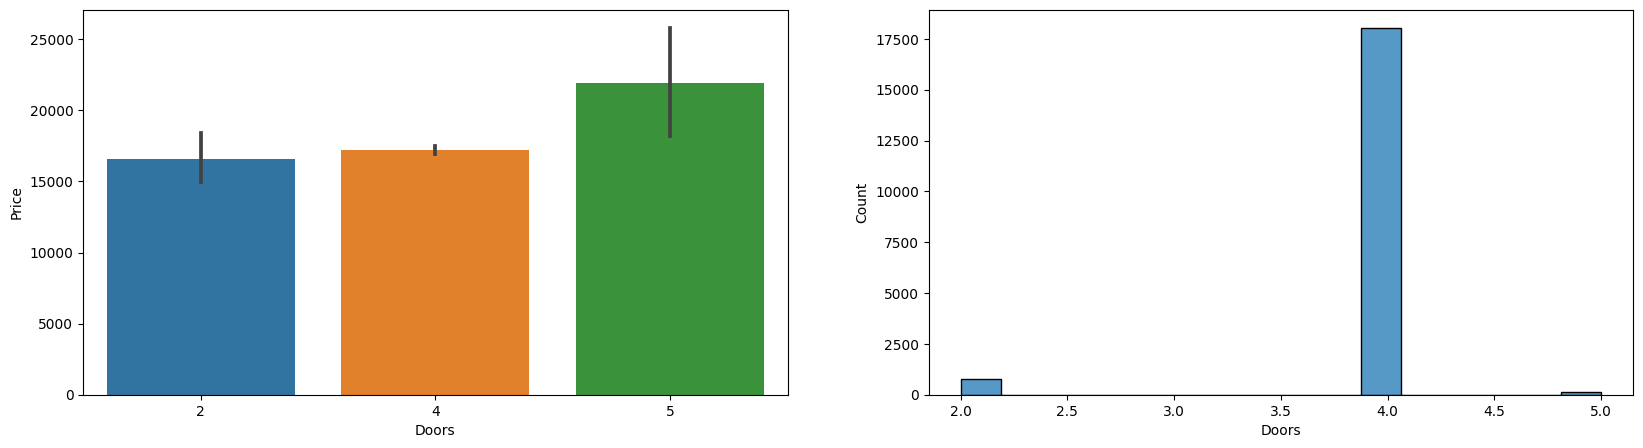

In [127]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(data=df, x='Doors', y='Price', estimator='mean')

plt.subplot(1,2,2)
sns.histplot(data=df['Doors'])

In [128]:
df['Wheel'].unique()

array(['Left wheel', 'Right-hand drive'], dtype=object)

In [129]:
df.groupby('Wheel').agg({'Price':['count', 'mean', 'max', 'min']})

Price                          
                  count          mean     max min
Wheel                                            
Left wheel        17470  17889.322610  872946   1
Right-hand drive   1453   8888.271851  117604   3

<Axes: xlabel='Wheel', ylabel='Count'>

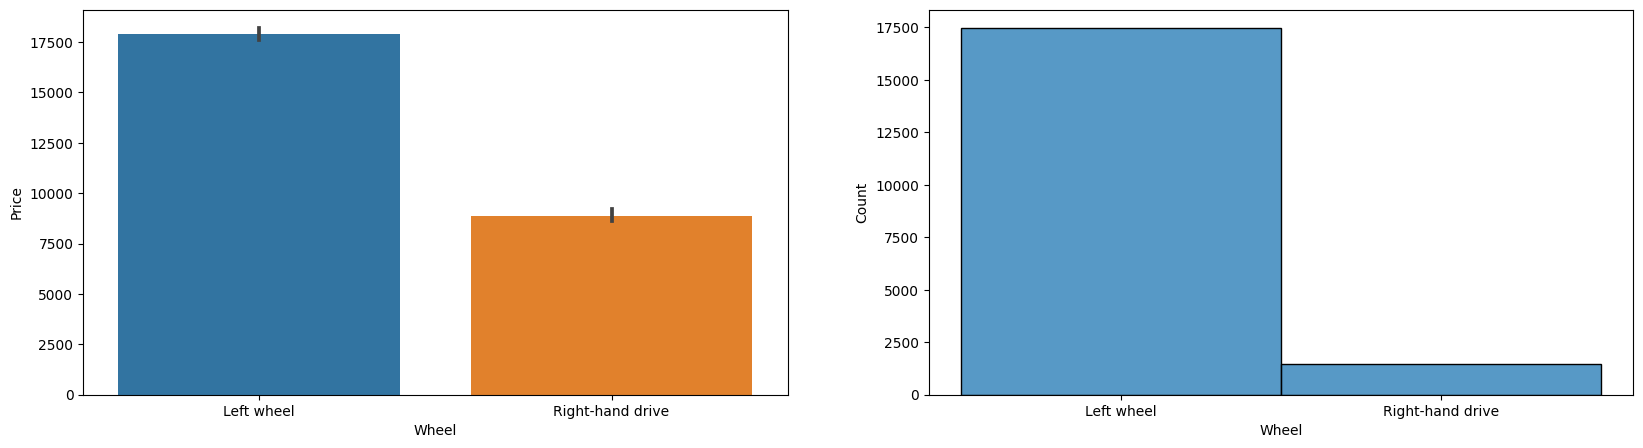

In [130]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(data=df, x='Wheel', y='Price', estimator='mean')

plt.subplot(1,2,2)
sns.histplot(data=df['Wheel'])

In [131]:
df['Color'].unique()

array(['Silver', 'Black', 'White', 'Grey', 'Blue', 'Green', 'Red',
       'Sky blue', 'Orange', 'Yellow', 'Brown', 'Golden', 'Beige',
       'Carnelian red', 'Purple', 'Pink'], dtype=object)

In [132]:
df.groupby('Color').agg({'Price':['count', 'mean', 'max', 'min']})

Price                            
              count          mean     max   min
Color                                          
Beige           134  15627.559701   79971    30
Black          4944  18915.184466  872946     1
Blue           1375  14922.490182  156805     3
Brown           185  19873.551351  123330     6
Carnelian red   177  15908.887006  117604    30
Golden          143  14529.006993   61154    60
Green           321   9477.894081  106627    25
Grey           2343  19242.446436  167781     3
Orange          252  13026.444444  150533   157
Pink             25  10598.360000   52687   150
Purple           39   8837.384615   39201     3
Red             622  13645.670418  109764     3
Silver         3729  15122.033253  193184     1
Sky blue        122  14079.000000   52373    40
White          4407  18141.962786  297930     3
Yellow          105  20715.561905  101923  1300

<Axes: xlabel='Color', ylabel='Count'>

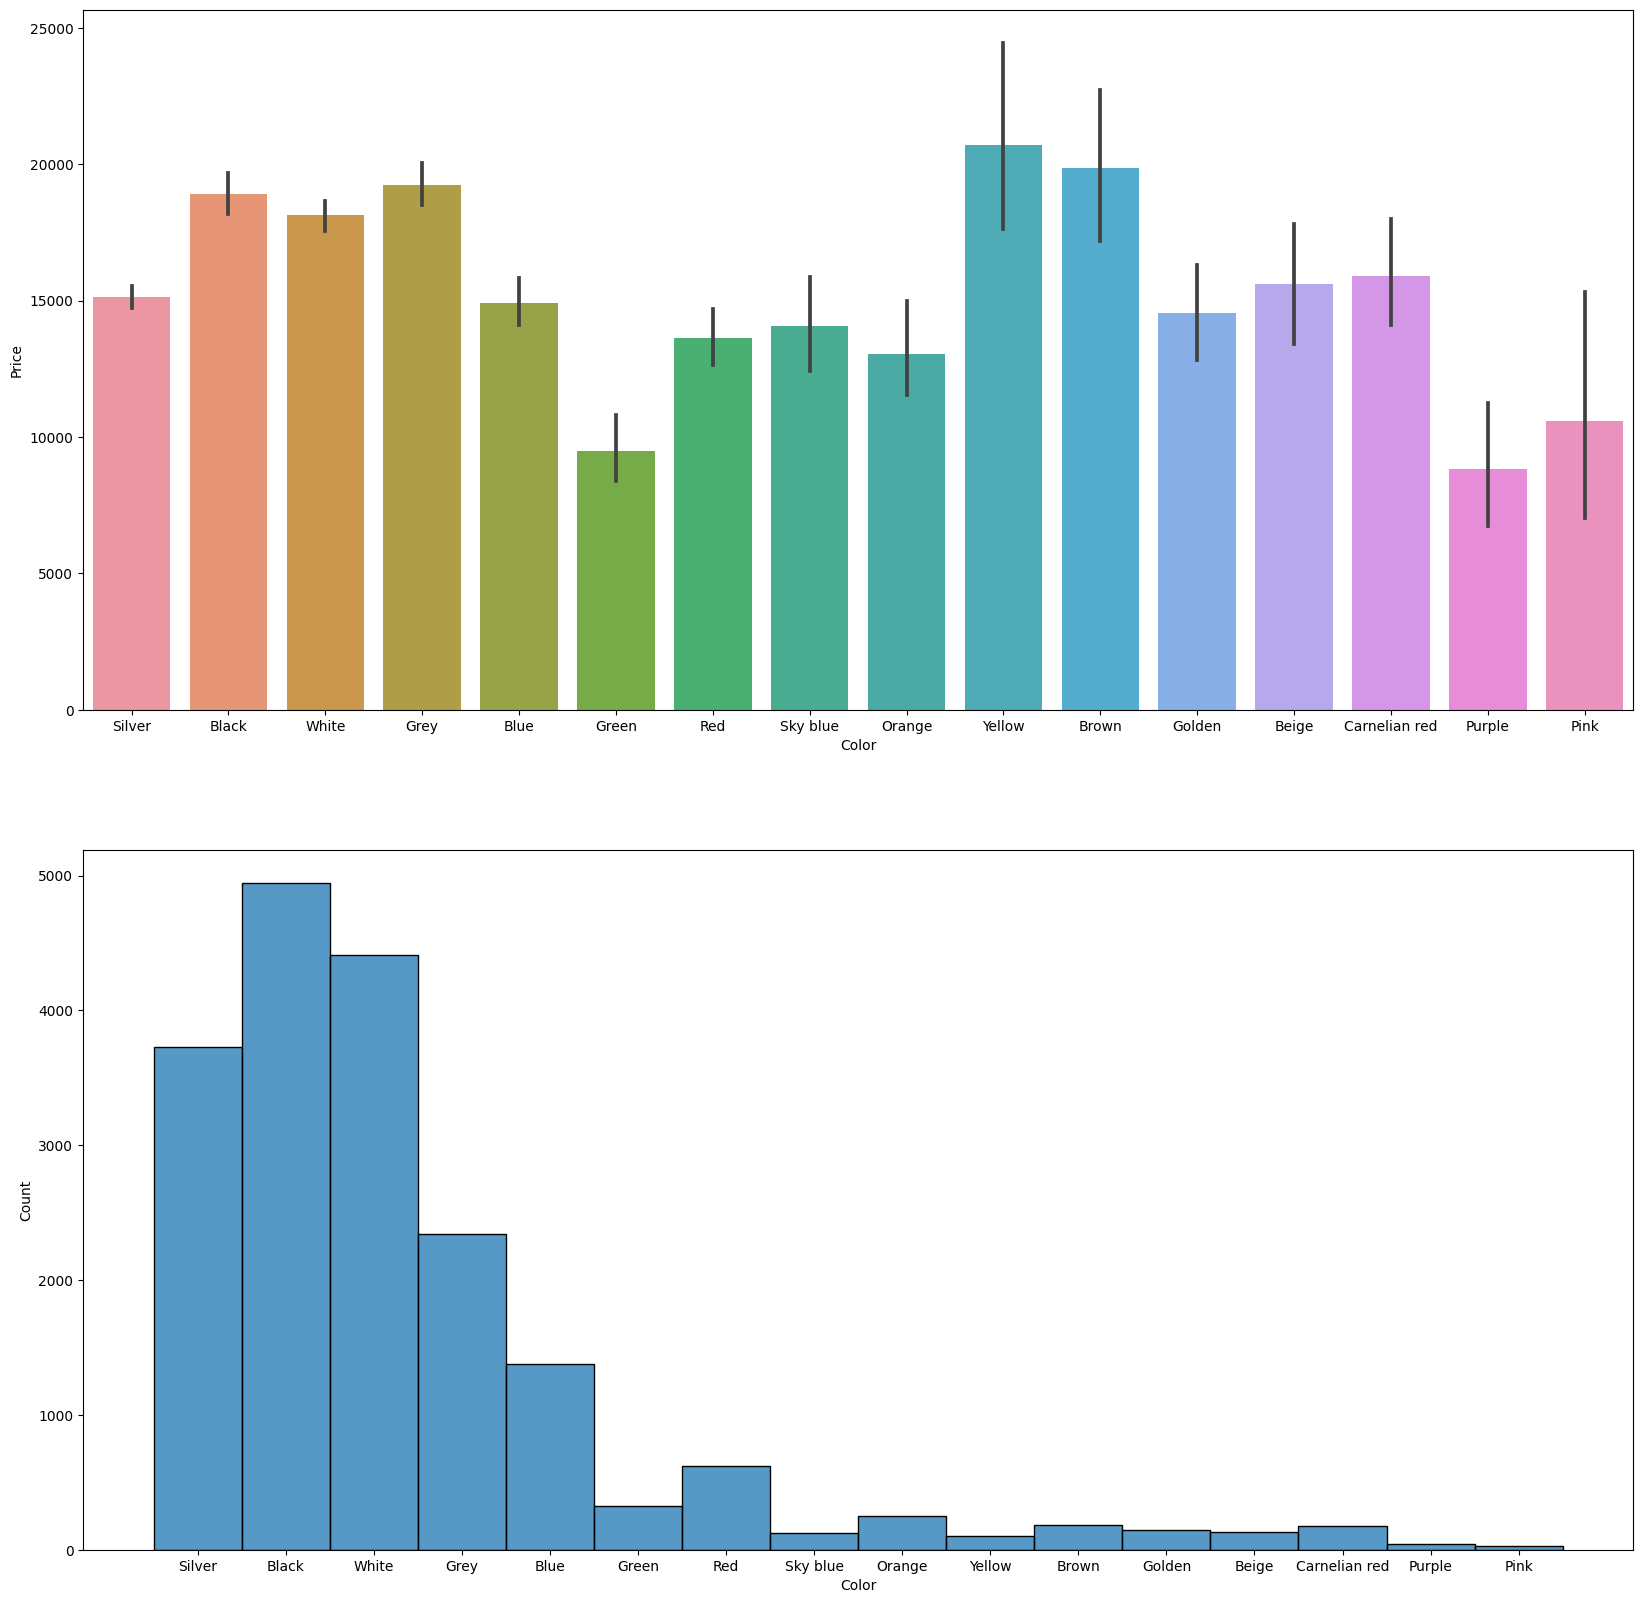

In [133]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.barplot(data=df, x='Color', y='Price', estimator='mean')

plt.subplot(2,1,2)
sns.histplot(data=df['Color'])

In [134]:
df['Airbags'].unique()

array([12,  8,  2,  0,  4,  6, 10,  3,  1, 16,  5,  7,  9, 11, 14, 15, 13])

In [135]:
df.groupby('Airbags').agg({'Price':['count', 'mean', 'max', 'min']})

Price                             
        count          mean     max    min
Airbags                                   
0        2383  12487.420059  872946      3
1          76  10890.618421   45473      6
2        1051  10465.677450  103491      1
3          37   8726.216216   23521      3
4        5733  22599.440607  137885      1
5         104  10936.730769   94083      6
6        1289  15671.381691  194438      3
7          85  16521.129412   97219     20
8        1569  18396.137030  119172      3
9          62  20001.016129  122308     30
10        845  22987.075740  260296     20
11         33  17538.939394   51432    150
12       5534  13883.560354  627220      3
13          2   6284.500000   12544     25
14         20  26659.400000   55823  10976
15          7  39201.428571  172486   7840
16         93  37318.741935  297930     40

<Axes: xlabel='Airbags', ylabel='Count'>

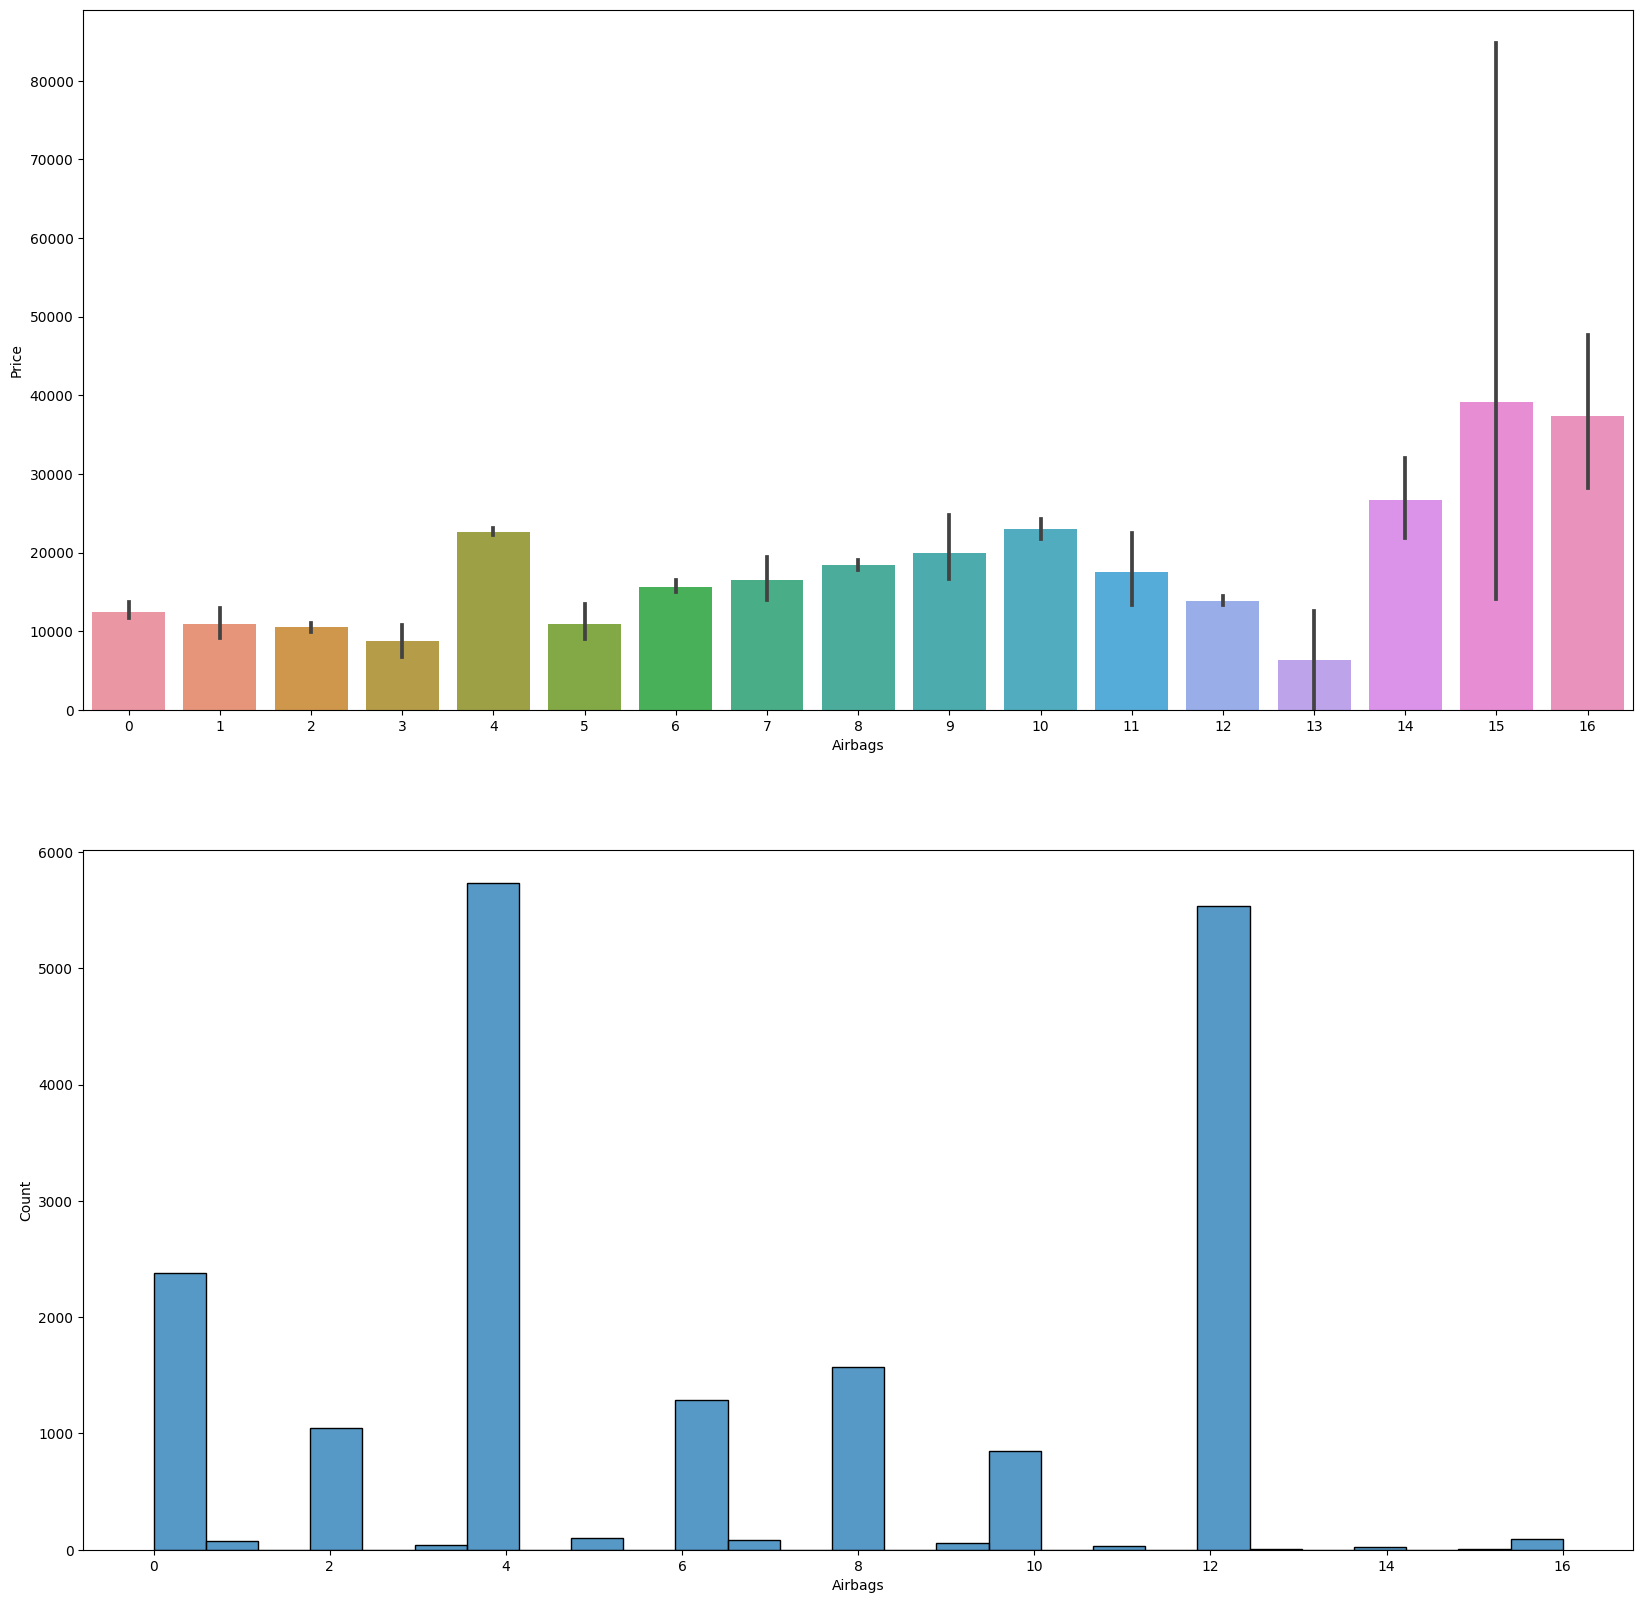

In [136]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.barplot(data=df, x='Airbags', y='Price', estimator='mean')

plt.subplot(2,1,2)
sns.histplot(data=df['Airbags'])

In [137]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,8467,781,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False


In [138]:
#filter outlier in column which have many values

df_temp = df[['Price','Levy','Mileage']]

for i in df_temp.columns:
  Q1=np.percentile(df[i],25)
  Q3=np.percentile(df[i],75)
  IQR=Q3-Q1
  bound = IQR * 1.5
  outlier_index = df_temp[(df[i] < Q1 - bound)|(df[i] > Q3 + bound)].index
  df_filtered = df.drop(outlier_index,axis=0)

In [139]:
df_filtered

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,8467,781,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,781,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,2,Left wheel,Silver,5,True
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8,False
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4,False
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,4,Left wheel,Black,4,False


In [140]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18288 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18288 non-null  int64  
 1   Levy              18288 non-null  int64  
 2   Manufacturer      18288 non-null  object 
 3   Model             18288 non-null  object 
 4   Prod. year        18288 non-null  int64  
 5   Category          18288 non-null  object 
 6   Leather interior  18288 non-null  object 
 7   Fuel type         18288 non-null  object 
 8   Engine volume     18288 non-null  float64
 9   Mileage           18288 non-null  int64  
 10  Cylinders         18288 non-null  float64
 11  Gear box type     18288 non-null  object 
 12  Drive wheels      18288 non-null  object 
 13  Doors             18288 non-null  int64  
 14  Wheel             18288 non-null  object 
 15  Color             18288 non-null  object 
 16  Airbags           18288 non-null  int64 

In [141]:
col_num = ['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Doors',
           'Airbags']
col_obj = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
           'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo']

In [142]:
df_num = df_filtered[col_num]
df_col = df_filtered[col_obj]

In [143]:
#transfer data in numeric column
scaler = StandardScaler()
df_num_scal = scaler.fit_transform(df_num)
df_num_scal

array([[ 1.34415899, -0.16847448,  1.34793747, ...,  1.17150337,
         0.18595957,  1.25170881],
       [ 0.37667503,  0.00939536,  0.78245233, ...,  1.17150337,
         0.18595957,  0.32751927],
       [-0.22514569, -0.8799538 , -1.14019713, ..., -0.48692862,
         0.18595957, -1.05876504],
       ...,
       [-0.08548265, -0.16847448, -0.34851794, ..., -0.48692862,
         0.18595957, -0.59667027],
       [ 1.06229358, -0.70208397, -0.34851794, ..., -0.48692862,
         0.18595957, -0.59667027],
       [-0.29624687,  0.18726519,  0.10387017, ..., -0.48692862,
         0.18595957,  1.25170881]])

In [144]:
#transfer data in categorical column
onehot = OneHotEncoder(sparse=False)
df_obj_scal=onehot.fit_transform(df_col)
df_obj_scal

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [145]:
df_num_scal.shape

(18288, 7)

In [146]:
df_obj_scal.shape

(18288, 1688)

In [147]:
df_input = np.hstack((df_num_scal,df_obj_scal))
df_input

array([[ 1.34415899, -0.16847448,  1.34793747, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.37667503,  0.00939536,  0.78245233, ...,  0.        ,
         1.        ,  0.        ],
       [-0.22514569, -0.8799538 , -1.14019713, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.08548265, -0.16847448, -0.34851794, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.06229358, -0.70208397, -0.34851794, ...,  0.        ,
         1.        ,  0.        ],
       [-0.29624687,  0.18726519,  0.10387017, ...,  0.        ,
         1.        ,  0.        ]])

In [148]:
x=df_input
y=df_filtered['Price']

In [149]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=123)

In [150]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [151]:
y_pred = lin_reg.predict(x_train)
mse = mean_squared_error(y_train,y_pred)
lin_reg_rmse =np.sqrt(mse)
lin_reg_rmse

11833.522325542775

In [152]:
lin_reg_mae = mean_absolute_error(y_train,y_pred)
lin_reg_mae

7800.7462088072325

In [153]:
tree_reg = DecisionTreeRegressor(random_state=123)
tree_reg.fit(x_train,y_train)


DecisionTreeRegressor(random_state=123)

In [154]:
y_pred = tree_reg.predict(x_train)
mse = mean_squared_error(y_train,y_pred)
tree_reg_rmse = np.sqrt(mse)
tree_reg_rmse

1989.3040531676259

In [155]:
tree_reg_mae = mean_absolute_error(y_train,y_pred)
tree_reg_mae

209.63962570175326

In [78]:
forest_reg = RandomForestRegressor(n_estimators = 100, random_state=123)
forest_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=123)

In [157]:
y_pred = forest_reg.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
forest_reg_rmse = np.sqrt(mse)
forest_reg_rmse

4558.522378857736

In [158]:
forest_reg_mae = mean_absolute_error(y_train, y_pred)
forest_reg_mae

1780.8474746028292

In [167]:
result = [['Linear Regression', lin_reg_rmse,lin_reg_mae],
          ['Decision Tree', tree_reg_rmse,tree_reg_mae],
           ['Random Forest',forest_reg_rmse,forest_reg_mae]]

output = pd.DataFrame(data = result ,columns=["algorithms","root mean squared error","mean absolute error"])

output

,algorithms,root mean squared error,mean absolute error
0,Linear Regression,11833.522326,7800.746209
1,Decision Tree,1989.304053,209.639626
2,Random Forest,4558.522379,1780.847475
